# Happy Customers Project

## Background:
We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

## Data Description:
Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers <br>
X1 = my order was delivered on time <br>
X2 = contents of my order was as I expected <br>
X3 = I ordered everything I wanted to order <br>
X4 = I paid a good price for my order <br>
X5 = I am satisfied with my courier <br>
X6 = the app makes ordering easy for me <br>

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.


## Goal:
Predict if a customer is happy or not based on the answers they give to questions asked.

In [ ]:
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2, RFE

In [2]:
df = pd.read_csv("dataset.csv", index_col=False)

print(np.shape(df))
df.head()

(126, 7)


,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


The dataset contains 126 examples with no null values. All the features are integer datatype

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,126.0,0.547619,0.499714,0.0,0.0,1.0,1.0,1.0
X1,126.0,4.333333,0.800000,1.0,4.0,5.0,5.0,5.0
X2,126.0,2.531746,1.114892,1.0,2.0,3.0,3.0,5.0
X3,126.0,3.309524,1.023440,1.0,3.0,3.0,4.0,5.0
X4,126.0,3.746032,0.875776,1.0,3.0,4.0,4.0,5.0
X5,126.0,3.650794,1.147641,1.0,3.0,4.0,4.0,5.0
X6,126.0,4.253968,0.809311,1.0,4.0,4.0,5.0,5.0


<AxesSubplot:>

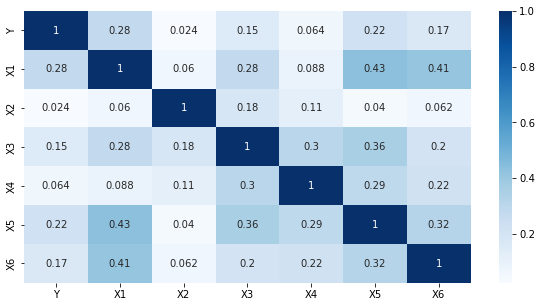

In [5]:
# Creating a correlation matrix to check if there are highly correlated features
fig, ax = plt.subplots(figsize=(10, 5))
correlation_matrix = df.corr().abs()
sns.heatmap(correlation_matrix, annot=True, cmap="Blues")

In [6]:
#sns.pairplot(df)

# Feature Selection
full_data = df.drop(['Y'], axis = 1)

# Select K best feature (Univariate Feature Selection) with chi squared error
k_best = SelectKBest(score_func=chi2, k=3).fit(full_data, df['Y'])
mask = k_best.get_support()
kbest_features = [] 
for bol, feature in zip(mask, full_data.columns):
    if bol:
        kbest_features.append(feature)
print("The K best features are:", kbest_features)

# Recursive Feature Elimination (RFE)
model = RandomForestClassifier(random_state = 42)
rfe = RFE(model, n_features_to_select=3)
rfe = rfe.fit(full_data, df['Y'])
rfe_mask = rfe.get_support()
rfe_features = [] 
for bol, feature in zip(rfe_mask, full_data.columns):
    if bol:
        rfe_features.append(feature)
print("The best features after RFE are:", rfe_features)


The K best features are: ['X1', 'X3', 'X5']
The best features after RFE are: ['X1', 'X2', 'X5']


In [7]:
target = df['Y']
data = df.drop(['Y', 'X2', 'X4', 'X6'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)
print("Size of our training data: ", X_train.shape)
print("Target values of training data: ", X_test.shape)
print("Size of our testing data: ", y_train.shape)
print("Target values of testing data: ", y_test.shape)
print("\n")
print("The data contains {} examples belonging to class 0 (unhappy) and {} examples belonging to class 1 (happy)."
      .format(np.bincount(target)[0], np.bincount(target)[1]))
print("Trainig data contains {} examples belonging to class 0 (unhappy) and {} examples belonging to class 1 (happy)."
      .format(np.bincount(y_train)[0], np.bincount(y_train)[1]))
print("Testing data contains {} examples belonging to class 0 (unhappy) and {} examples belonging to class 1 (happy)."
      .format(np.bincount(y_test)[0], np.bincount(y_test)[1]))

Size of our training data:  (88, 6)
Target values of training data:  (38, 6)
Size of our testing data:  (88,)
Target values of testing data:  (38,)


The data contains 57 examples belonging to class 0 (unhappy) and 69 examples belonging to class 1 (happy).
Trainig data contains 37 examples belonging to class 0 (unhappy) and 51 examples belonging to class 1 (happy).
Testing data contains 20 examples belonging to class 0 (unhappy) and 18 examples belonging to class 1 (happy).


In [8]:
def conf_matrix(test, predictions, model, X_train, y_train):
    print("Training Score: ", model.score(X_train, y_train))
    print("Accuracy of our model on test data is : ", accuracy_score(test, predictions))
    print(np.bincount(predictions))
    cm = confusion_matrix(test, predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    print(classification_report(test, predictions))

Training Score:  0.8863636363636364
Accuracy of our model on test data is :  0.7105263157894737
[17 21]


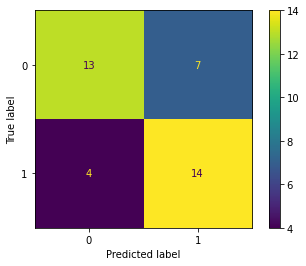

              precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.67      0.78      0.72        18

    accuracy                           0.71        38
   macro avg       0.72      0.71      0.71        38
weighted avg       0.72      0.71      0.71        38



In [9]:
# Random forest classifier (ensemble learning)
rfc = RandomForestClassifier(n_estimators=6, random_state=42)
rfc.fit(X_train, y_train)
y_predict_rfc = rfc.predict(X_test)
conf_matrix(y_test, y_predict_rfc, rfc, X_train, y_train)

Training Score:  0.875
Accuracy of our model on test data is :  0.5526315789473685
[13 25]


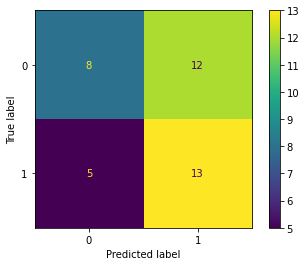

              precision    recall  f1-score   support

           0       0.62      0.40      0.48        20
           1       0.52      0.72      0.60        18

    accuracy                           0.55        38
   macro avg       0.57      0.56      0.54        38
weighted avg       0.57      0.55      0.54        38



In [10]:
# Decision Trees: They are sensitive to data
dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=42)
dec_tree.fit(X_train, y_train)
y_pred_dec = dec_tree.predict(X_test)
conf_matrix(y_test, y_pred_dec, dec_tree, X_train, y_train)

Training Score:  0.6477272727272727
Accuracy of our model on test data is :  0.5
[15 23]


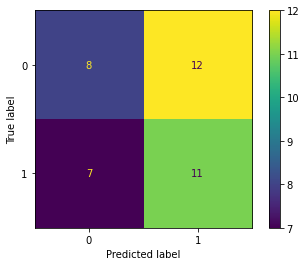

              precision    recall  f1-score   support

           0       0.53      0.40      0.46        20
           1       0.48      0.61      0.54        18

    accuracy                           0.50        38
   macro avg       0.51      0.51      0.50        38
weighted avg       0.51      0.50      0.49        38



In [11]:
# logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lg = log_reg.predict(X_test)
conf_matrix(y_test, y_pred_lg, log_reg, X_train, y_train)